In [1]:
import pandas as pd
import os
from pprint import pprint
import requests
import json
from config import api_key
import sys
import matplotlib.pyplot as plt

In [2]:
#Made edits in excel, pulling back in
clean_hospital= pd.read_csv("Cleaned_Hospitals_v7.csv")
clean_hospital = clean_hospital.drop(columns=['Unnamed: 0'])
clean_hospital

,Hospital name,City,County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longtitude,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longtitude,Median Income,Population,Joined
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30702.0,34.487833,-84.850071,24110,40820,False
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,24457,33460,False
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31776.5,30.862504,-83.928812,22498,20703,False
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,24644,9062,False
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,21584,8419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,Wrens,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30833.0,33.200325,-82.376250,18634,3065,True
613,NaN,Wrightsville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31096.0,32.717320,-82.689260,20232,7046,True
614,NaN,Yatesville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31097.0,32.912207,-84.148120,27000,1656,True
615,NaN,Young Harris,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30582.0,34.954638,-83.864840,15867,5038,True


In [3]:
hospital_data = clean_hospital[['Hospital name', 'City', 'Acute Care Beds', 'Population']]
hospital_sum = hospital_data.groupby('City').sum()
hospital_sum = hospital_sum.reset_index()
hospital_sum

,City,Acute Care Beds,Population
0,Abbeville,0,4563
1,Acworth,0,49841
2,Adairsville,0,16138
3,Adel,60,10836
4,Adrian,0,3071
...,...,...,...
587,Wrens,0,3065
588,Wrightsville,0,7046
589,Yatesville,0,1656
590,Young Harris,0,5038


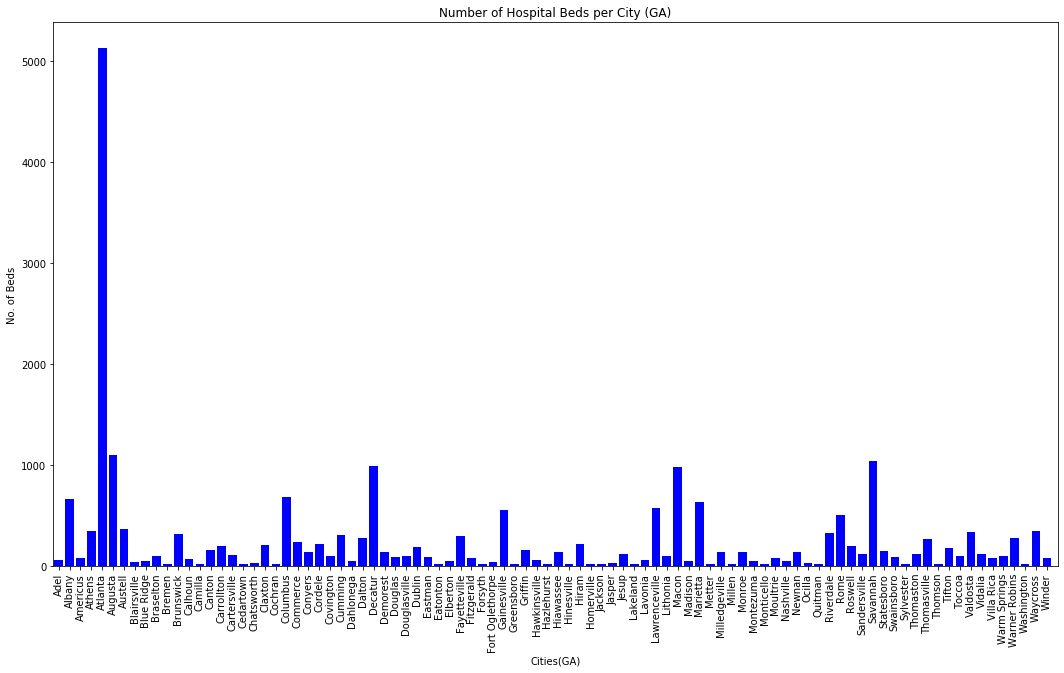

In [8]:
hospital_bed = hospital_sum.loc[(hospital_sum['Acute Care Beds'] > 0)]
hospital_bed
plt.figure(figsize=(18,10))
plt.bar(hospital_bed['City'],hospital_bed['Acute Care Beds'], color="blue")
plt.xticks(hospital_bed['City'], rotation='vertical')
plt.title('Number of Hospital Beds per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Beds')
plt.xlim(-0.5,len(hospital_bed['City']))

plt.savefig("Hospital_Beds_per_City.png")

plt.show()



In [5]:
hospital_count = hospital_data.groupby('City').count()
hospital_count = hospital_count.reset_index()
hospital_count



,City,Hospital name,Acute Care Beds,Population
0,Abbeville,0,1,1
1,Acworth,0,1,1
2,Adairsville,0,1,1
3,Adel,1,1,1
4,Adrian,0,1,1
...,...,...,...,...
587,Wrens,0,1,1
588,Wrightsville,0,1,1
589,Yatesville,0,1,1
590,Young Harris,0,1,1


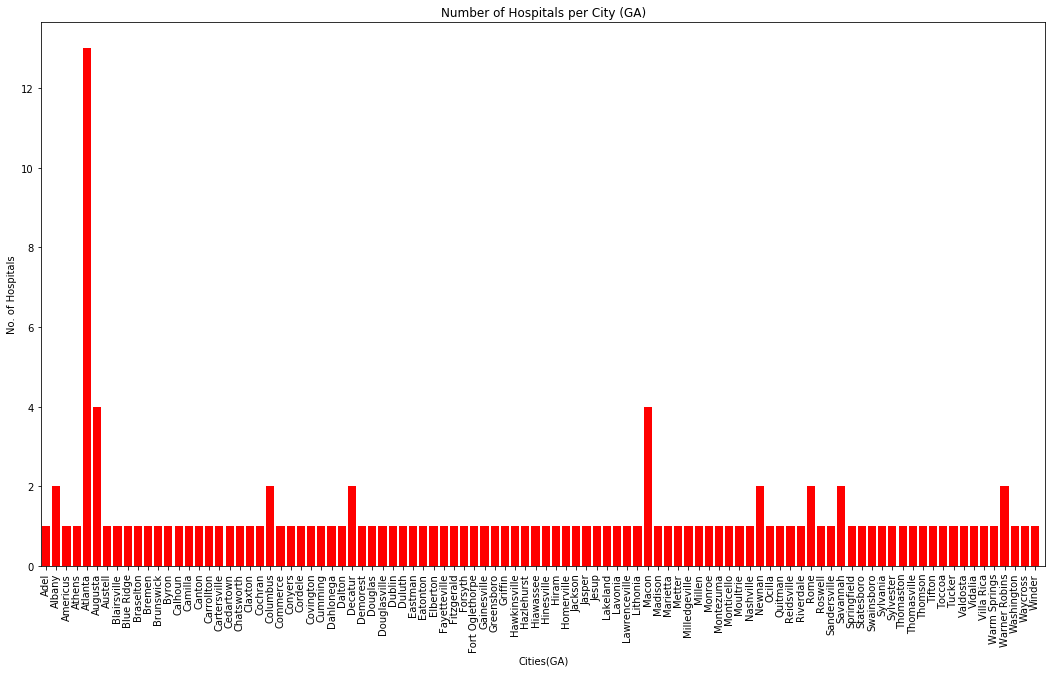

In [7]:
hospital_count = hospital_count.loc[(hospital_count['Hospital name'] > 0)]
hospital_count


plt.figure(figsize=(18,10))
plt.bar(hospital_count['City'],hospital_count['Hospital name'], color="red")
plt.xticks(hospital_count['City'], rotation='vertical')
plt.title('Number of Hospitals per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Hospitals')
plt.xlim(-0.5,len(hospital_count['City']))


plt.savefig("Hospitals_per_City.png")
plt.show()
